### 2023년_전국버스정류장 위치정보_데이터 전처리 및 시각화 ### 





In [1]:
import pandas as pd

bs_location = pd.read_csv("C:\\Users\\SAMSUNG\\Downloads\\2023년_전국버스정류장 위치정보_데이터.csv", encoding ="cp949")
bs_location.head()

,정류장번호,정류장명,위도,경도,정보수집일,모바일단축번호,도시코드,도시명,관리도시명
0,ADB354000076,신덕1리,36.524325,128.830926,2023-10-16,540076.0,37040,경상북도 안동시,안동
1,ADB354000077,나천,36.484444,128.876390,2023-10-16,540077.0,37040,경상북도 안동시,안동
2,ADB354000078,골삽실,36.462248,128.887606,2023-10-16,540078.0,37040,경상북도 안동시,안동
3,ADB354000079,금곡(길안),36.394360,128.933281,2023-10-16,540079.0,37040,경상북도 안동시,안동
4,ADB354000080,대사.토일,36.368580,128.940353,2023-10-16,540080.0,37040,경상북도 안동시,안동


In [2]:
bs_location

,정류장번호,정류장명,위도,경도,정보수집일,모바일단축번호,도시코드,도시명,관리도시명
0,ADB354000076,신덕1리,36.524325,128.830926,2023-10-16,540076.0,37040,경상북도 안동시,안동
1,ADB354000077,나천,36.484444,128.876390,2023-10-16,540077.0,37040,경상북도 안동시,안동
2,ADB354000078,골삽실,36.462248,128.887606,2023-10-16,540078.0,37040,경상북도 안동시,안동
3,ADB354000079,금곡(길안),36.394360,128.933281,2023-10-16,540079.0,37040,경상북도 안동시,안동
4,ADB354000080,대사.토일,36.368580,128.940353,2023-10-16,540080.0,37040,경상북도 안동시,안동
...,...,...,...,...,...,...,...,...,...
204204,USB196066514,새진흥아파트,35.540264,129.106553,2023-10-16,66514.0,26,울산광역시,울산
204205,USB196066515,부일맨션,35.539081,129.104984,2023-10-16,66515.0,26,울산광역시,울산
204206,USB196066516,부일맨션,35.539203,129.104913,2023-10-16,66516.0,26,울산광역시,울산
204207,USB196066601,석남유치원,35.562269,129.116000,2023-10-16,66601.0,26,울산광역시,울산


In [38]:
bs_location.info()


<class 'pandas.core.frame.DataFrame'>
Index: 187350 entries, 0 to 204208
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   정류장번호    187350 non-null  object 
 1   정류장명     187350 non-null  object 
 2   위도       187350 non-null  float64
 3   경도       187350 non-null  float64
 4   정보수집일    187350 non-null  object 
 5   모바일단축번호  187350 non-null  float64
 6   도시코드     187350 non-null  int64  
 7   도시명      187350 non-null  object 
 8   관리도시명    187350 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 14.3+ MB


In [3]:
bs_location.isna().sum()

정류장번호          0
정류장명           2
위도             2
경도             2
정보수집일          0
모바일단축번호    16859
도시코드           0
도시명            0
관리도시명          0
dtype: int64

In [5]:
#표본 수에 비해 결측값이 매우 적음 -> 결측값을 제거하여 처리 

bs_location=bs_location.dropna()

In [7]:
bs_location.isna().sum()

정류장번호      0
정류장명       0
위도         0
경도         0
정보수집일      0
모바일단축번호    0
도시코드       0
도시명        0
관리도시명      0
dtype: int64

In [8]:
city_counts = bs_location.groupby('도시명').size()
print(city_counts)

도시명
강원특별자치도 강릉시      40
강원특별자치도 동해시     393
강원특별자치도 삼척시     147
강원특별자치도 속초시     215
강원특별자치도 양구군     216
               ... 
충청북도 증평군          4
충청북도 진천군        659
충청북도 청원군         28
충청북도 청주시       3225
충청북도 충주시       1993
Length: 158, dtype: int64


In [9]:
df_sorted = city_counts.sort_values(ascending=False)
print(df_sorted)

도시명
인천광역시       8954
부산광역시       4386
대구광역시       4168
서울특별시       3970
울산광역시       3822
            ... 
충청남도 금산군       4
충청남도 청양군       2
전라남도 강진군       2
경상남도 진해시       1
전라남도 담양군       1
Length: 158, dtype: int64


In [10]:
print(df_sorted.head(5),'\n')
print(df_sorted.tail(5))

도시명
인천광역시    8954
부산광역시    4386
대구광역시    4168
서울특별시    3970
울산광역시    3822
dtype: int64 

도시명
충청남도 금산군    4
충청남도 청양군    2
전라남도 강진군    2
경상남도 진해시    1
전라남도 담양군    1
dtype: int64


In [20]:
dh=df_sorted.head()
dt=df_sorted.tail()

In [21]:
combined_df = pd.concat([dh, dt]).reset_index()
combined_df.columns = ['도시명', '값']
print(combined_df)

        도시명     값
0     인천광역시  8954
1     부산광역시  4386
2     대구광역시  4168
3     서울특별시  3970
4     울산광역시  3822
5  충청남도 금산군     4
6  충청남도 청양군     2
7  전라남도 강진군     2
8  경상남도 진해시     1
9  전라남도 담양군     1


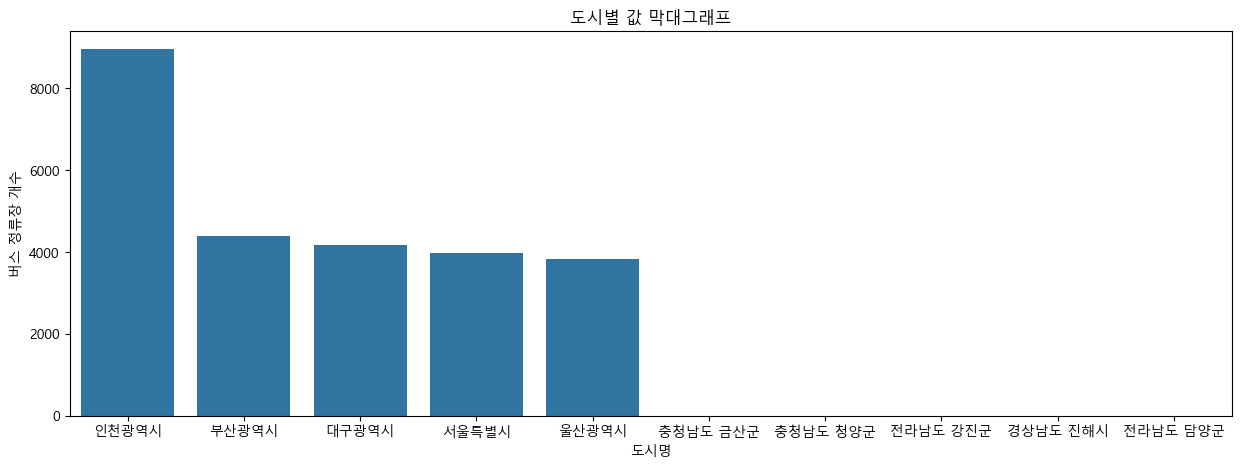

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,5))
bs=sns.barplot(x="도시명",y="값", data=combined_df)
plt.xticks(rotation=0)


plt.title("도시별 값 막대그래프")
plt.xlabel("도시명")
plt.ylabel("버스 정류장 개수")


plt.show()

In [62]:
print("====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================")